In [1]:
#!pip install naive-bayes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [3]:
train=pd.read_csv('SalaryData_Train.csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
test=pd.read_csv('SalaryData_Test.csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


# Visualization

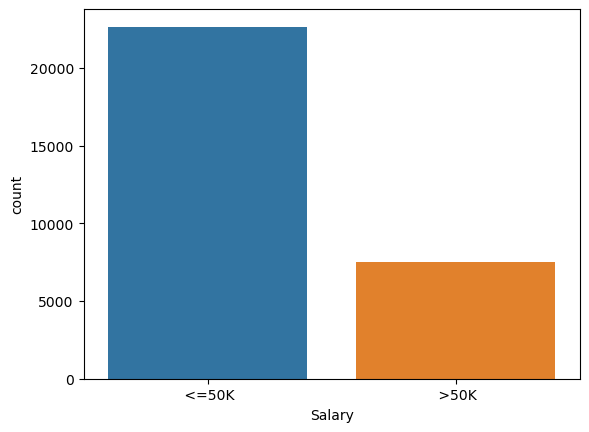

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [7]:
sns.countplot(x='Salary',data= train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
train['Salary'].value_counts()

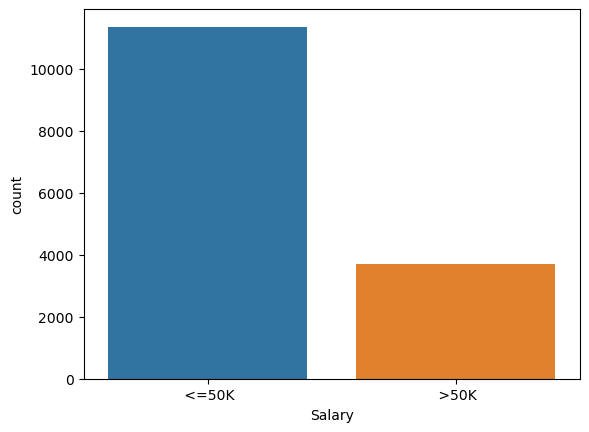

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [8]:
sns.countplot(x='Salary',data= test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
test['Salary'].value_counts()

C:\Users\apurv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='workclass'>

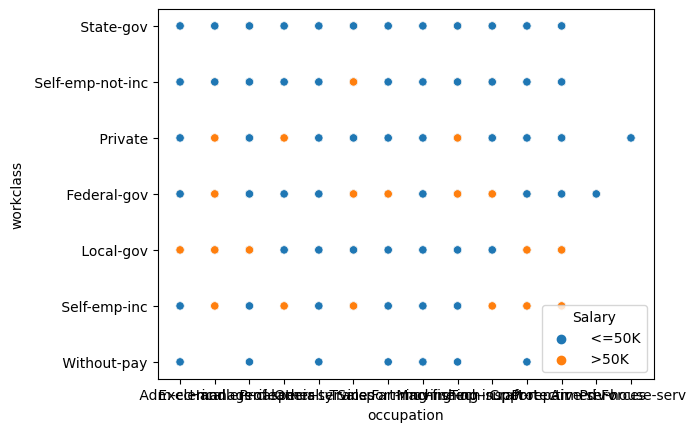

In [9]:
sns.scatterplot(train['occupation'],train['workclass'],hue=train['Salary'])

<AxesSubplot:xlabel='education'>

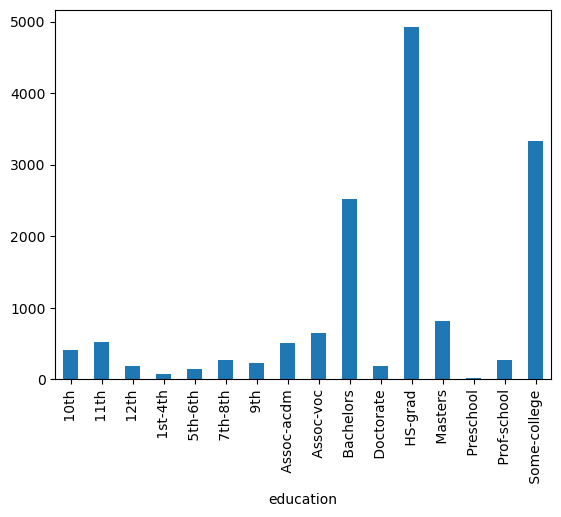

In [10]:
pd.crosstab(train['Salary'],train['education']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

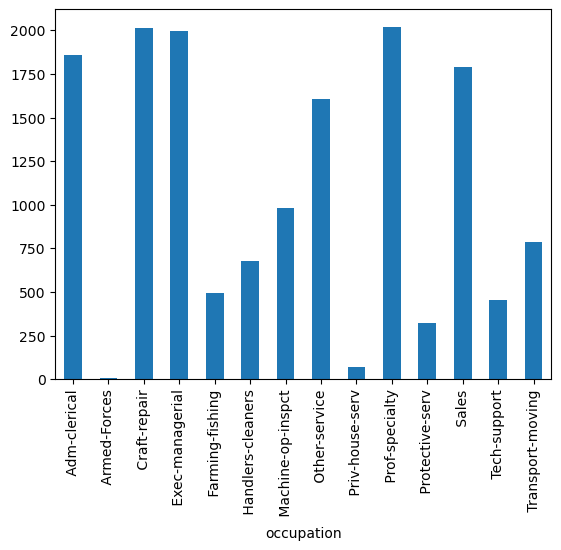

In [11]:
pd.crosstab(train['Salary'],train['occupation']).mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

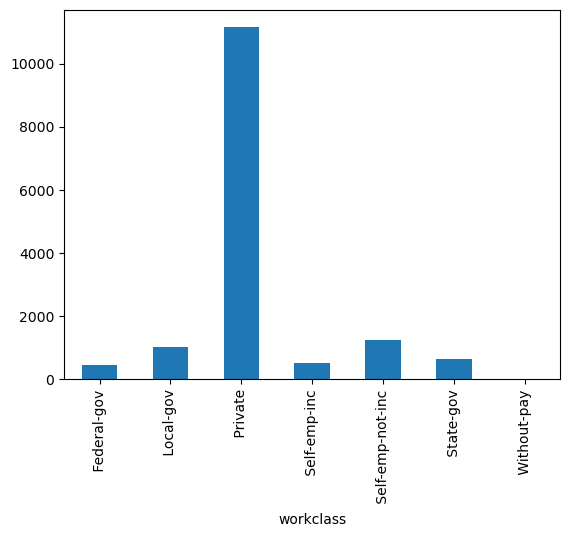

In [12]:
pd.crosstab(train['Salary'],train['workclass']).mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

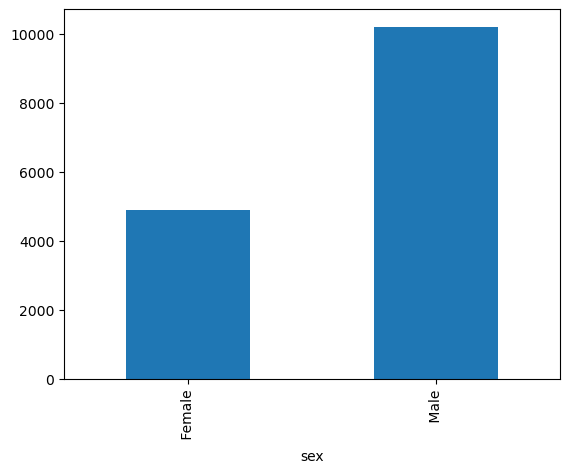

In [13]:
pd.crosstab(train['Salary'],train['sex']).mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

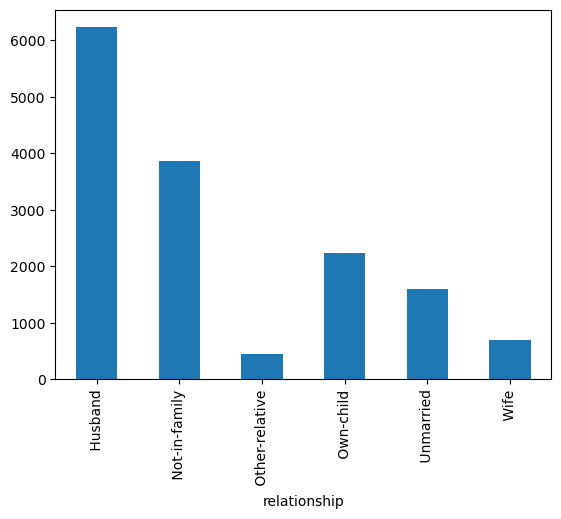

In [14]:
pd.crosstab(train['Salary'],train['relationship']).mean().plot(kind='bar')

In [15]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [16]:
train[train.duplicated()].shape

(3258, 14)

In [17]:
train =train.drop_duplicates()

In [18]:
train.isnull().sum().sum()

0

In [19]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [20]:
test[test.duplicated()].shape

(930, 14)

In [21]:
test=test.drop_duplicates()

In [22]:
test.isnull().sum().sum()

0

In [23]:
test.describe().round(2).style.background_gradient(cmap = 'Reds')

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.160000,10.120000,1185.900000,94.500000,41.070000
std,13.430000,2.600000,7903.190000,417.960000,12.270000
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [24]:
train.describe().round(2).style.background_gradient(cmap = 'Blues')

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.050000,10.140000,1215.440000,98.430000,41.160000
std,13.190000,2.620000,7805.370000,425.490000,12.350000
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Text(0.5, 1.0, 'Correlation between different fearures')

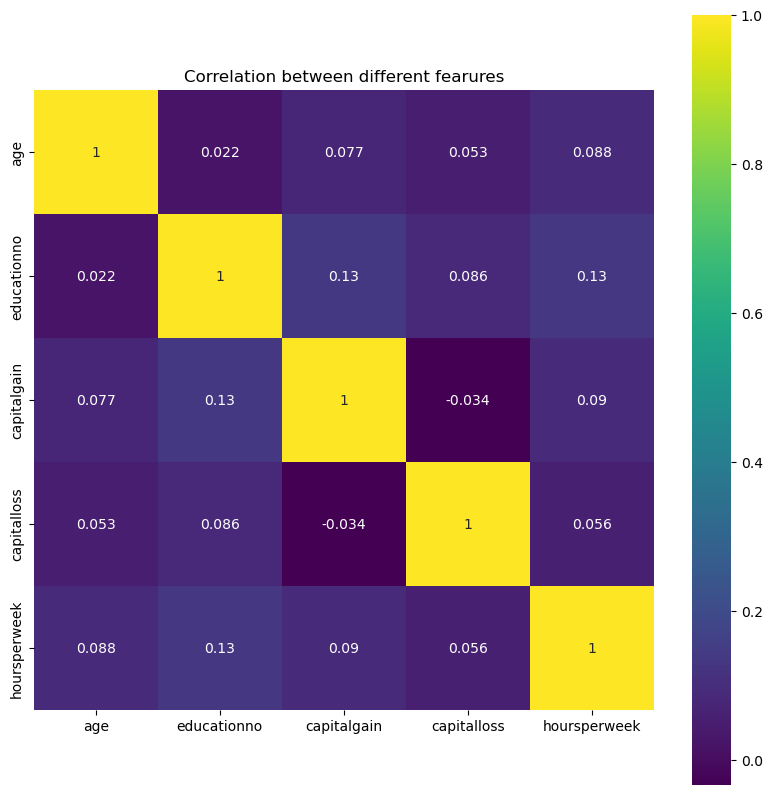

In [25]:
correlation = test.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')       
plt.title('Correlation between different fearures')

Text(0.5, 1.0, 'Correlation between different fearures')

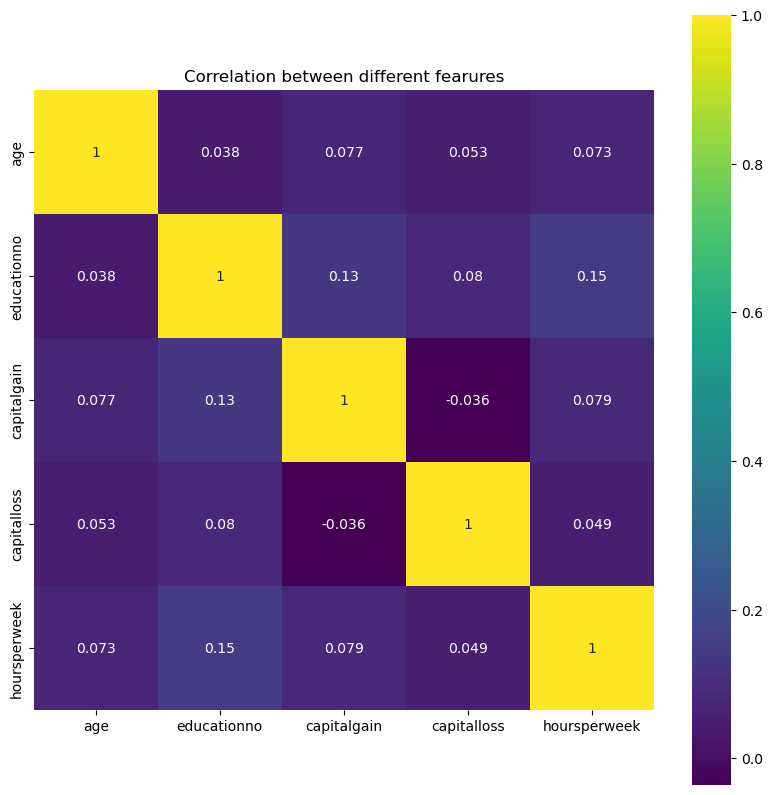

In [26]:
correlation = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')       
plt.title('Correlation between different fearures')

<AxesSubplot:>

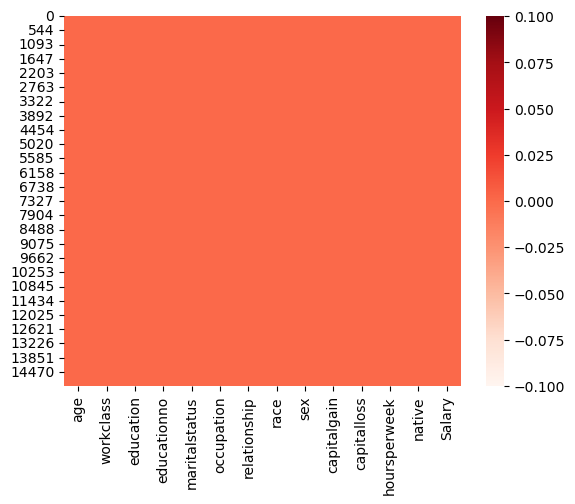

In [27]:
sns.heatmap(test.isnull(),cmap='Reds')

<AxesSubplot:>

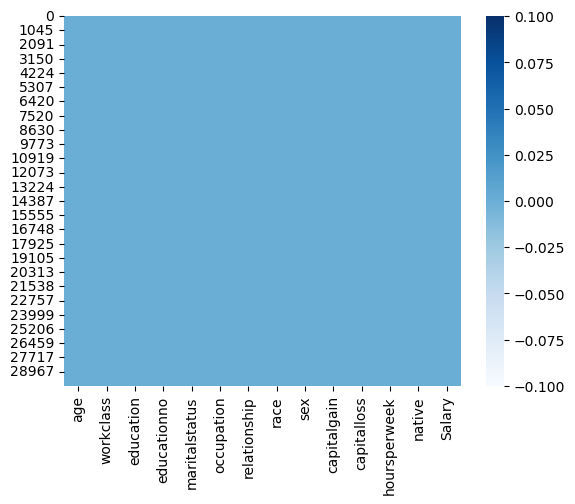

In [28]:
sns.heatmap(train.isnull(),cmap='Blues')

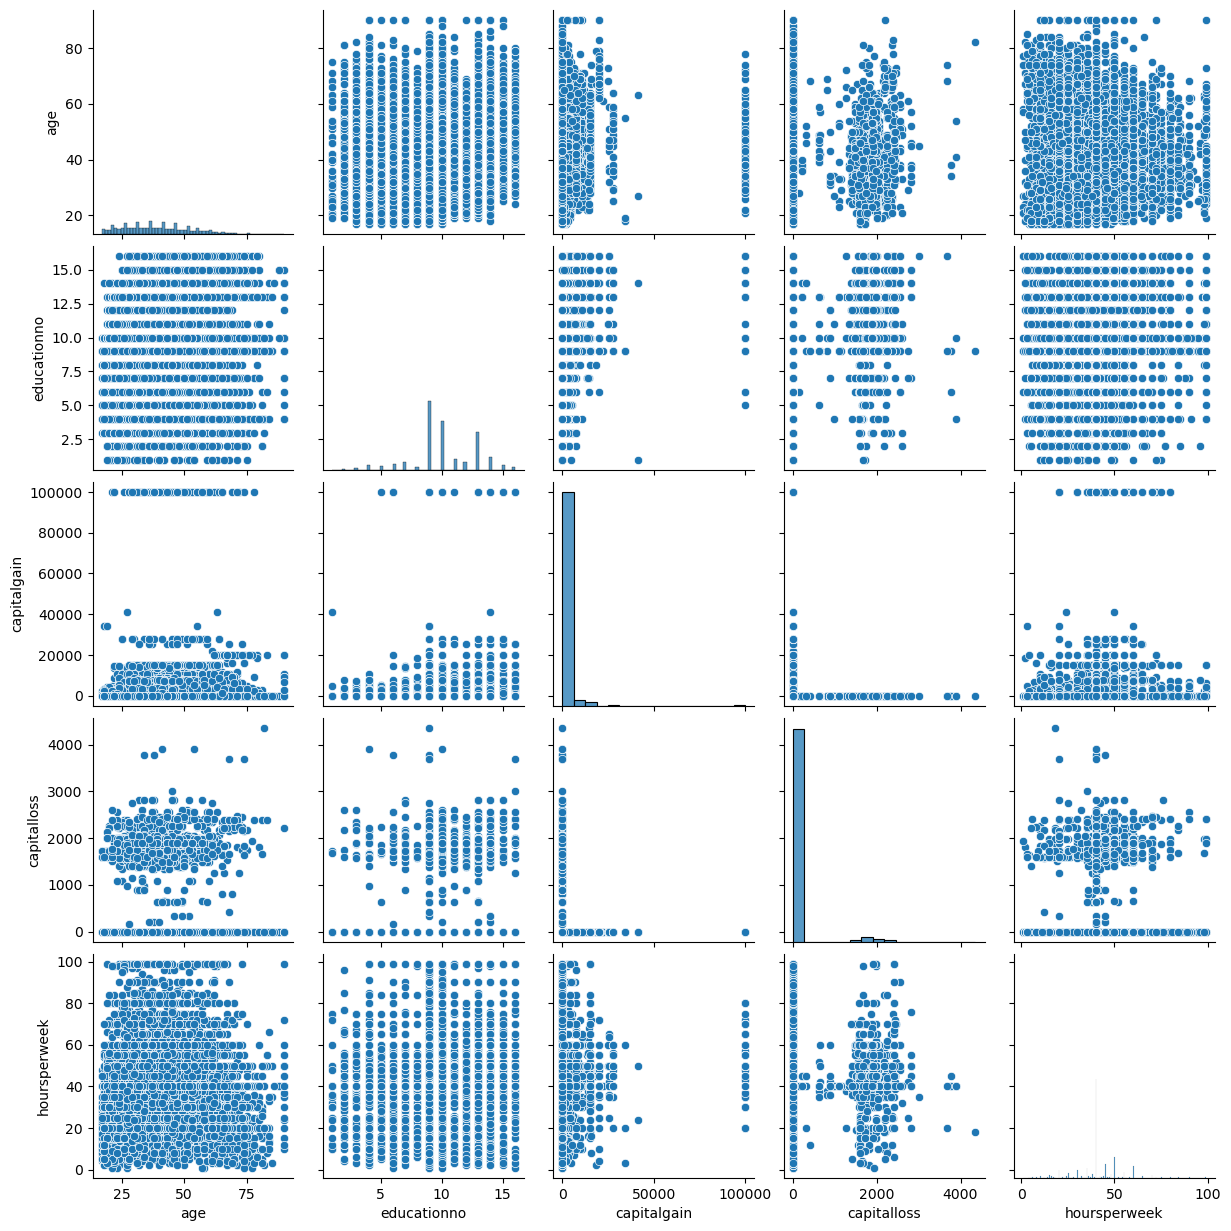

In [29]:
sns.pairplot(train)

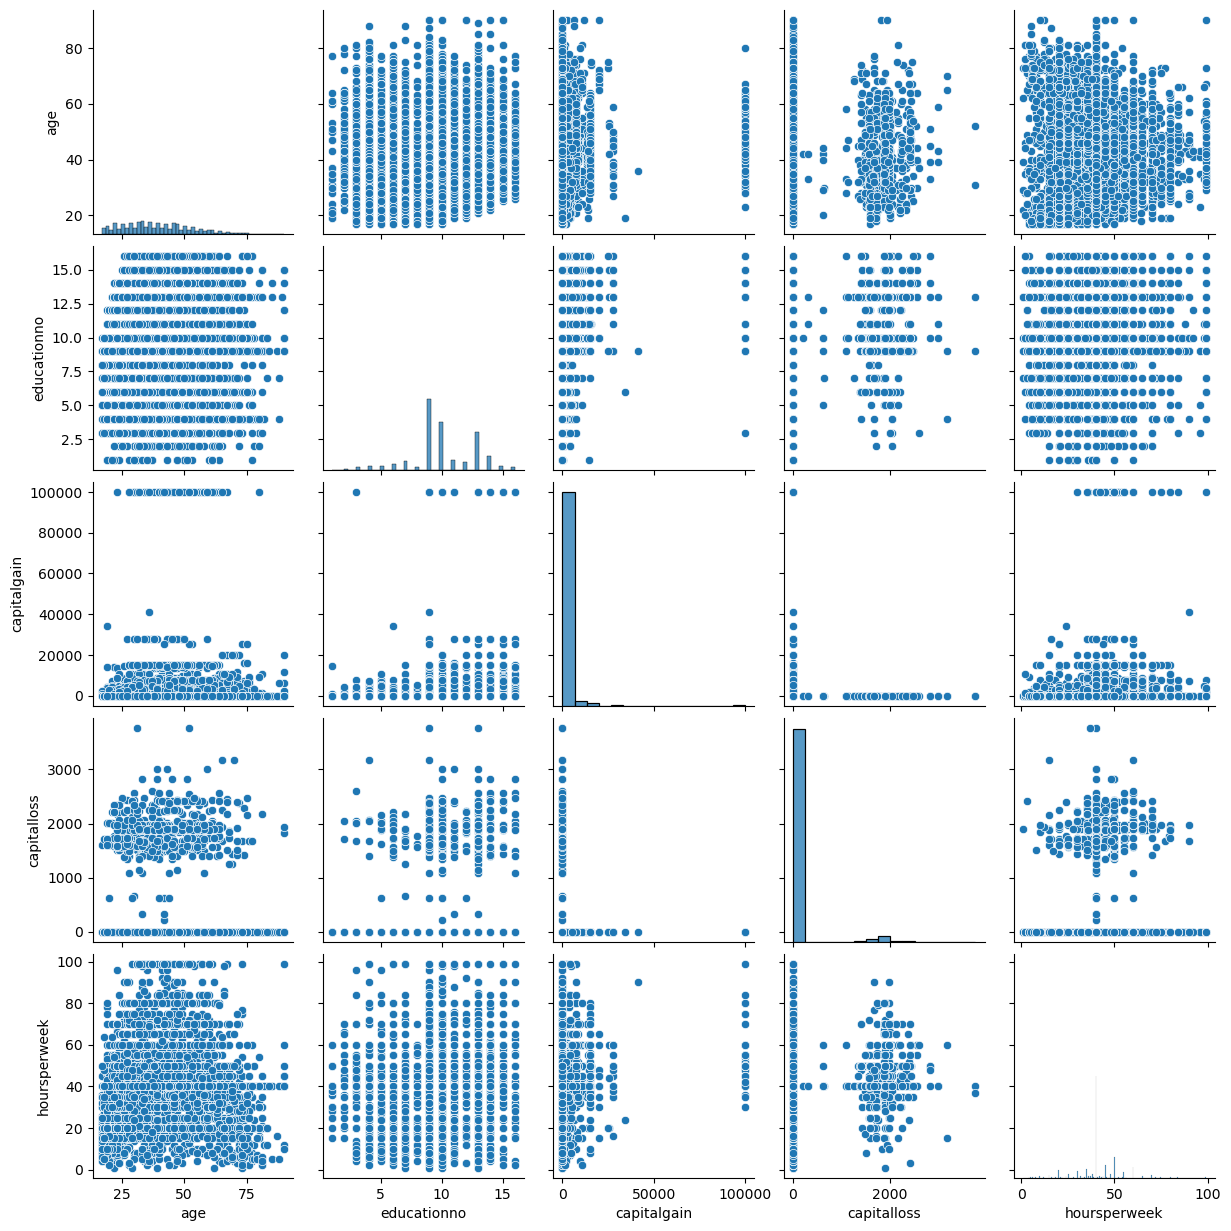

In [30]:
sns.pairplot(test)

In [31]:
train[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']] = train[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']].apply(lambda x: pd.factorize(x)[0])
train

C:\Users\apurv\AppData\Local\Temp\ipykernel_20356\2008193739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']] = train[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']].apply(lambda x: pd.factorize(x)[0])


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,0,13,1,3,2,1,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,3,14,1,1,1,0,0,0,0,40,0,1
30155,22,2,5,10,0,11,0,0,0,0,0,40,0,0
30156,27,2,6,12,1,9,2,0,1,0,0,38,0,0
30158,58,2,1,9,6,0,4,0,1,0,0,40,0,0


In [32]:
test[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']] = test[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']].apply(lambda x: pd.factorize(x)[0])
test

C:\Users\apurv\AppData\Local\Temp\ipykernel_20356\3039370338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']] = test[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']].apply(lambda x: pd.factorize(x)[0])


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,0,0,7,0,0,0,0,0,0,0,40,0,0
1,38,0,1,9,1,1,1,1,0,0,0,50,0,0
2,28,1,2,12,1,2,1,1,0,0,0,40,0,1
3,44,0,3,10,1,0,1,0,0,7688,0,40,0,1
4,34,0,4,6,0,3,2,1,0,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,0,7,13,0,4,0,1,0,0,0,40,0,0
15056,39,0,7,13,4,4,2,1,1,0,0,36,0,0
15057,38,0,7,13,1,4,1,1,0,0,0,50,0,0
15058,44,0,7,13,4,6,0,4,0,5455,0,40,0,0


In [33]:
X=train.iloc[:,0:13]
Y=train.iloc[:,13]
x=test.iloc[:,0:13]
y=test.iloc[:,13]

In [34]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,0,0,13,0,0,0,0,0,2174,0,40,0
1,50,1,0,13,1,1,1,0,0,0,0,13,0
2,38,2,1,9,2,2,0,0,0,0,0,40,0
3,53,2,2,7,1,2,1,1,0,0,0,40,0
4,28,2,0,13,1,3,2,1,1,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,3,14,1,1,1,0,0,0,0,40,0
30155,22,2,5,10,0,11,0,0,0,0,0,40,0
30156,27,2,6,12,1,9,2,0,1,0,0,38,0
30158,58,2,1,9,6,0,4,0,1,0,0,40,0


In [35]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
30154    1
30155    0
30156    0
30158    0
30160    1
Name: Salary, Length: 26903, dtype: int64

In [36]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,0,0,7,0,0,0,0,0,0,0,40,0
1,38,0,1,9,1,1,1,1,0,0,0,50,0
2,28,1,2,12,1,2,1,1,0,0,0,40,0
3,44,0,3,10,1,0,1,0,0,7688,0,40,0
4,34,0,4,6,0,3,2,1,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,0,7,13,0,4,0,1,0,0,0,40,0
15056,39,0,7,13,4,4,2,1,1,0,0,36,0
15057,38,0,7,13,1,4,1,1,0,0,0,50,0
15058,44,0,7,13,4,6,0,4,0,5455,0,40,0


In [37]:
y

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 14130, dtype: int64

# Naive Bayes

# Multinominal Naive bayes

In [38]:
clf_mb = MB()
clf_mb.fit(x,y)

MultinomialNB()

In [39]:
train_pred_m = clf_mb.predict(x)
accuracy_train_m = np.mean(train_pred_m==y)

In [40]:
test_pred_m = clf_mb.predict(x)
accuracy_test_m = np.mean(test_pred_m==y)

In [41]:
print('Training accuracy is:',accuracy_train_m,'\n','Testing accuracy is:',accuracy_test_m)

Training accuracy is: 0.7733899504600141 
 Testing accuracy is: 0.7733899504600141


# Gaussain Naive bayes

In [42]:
clf_gb = GB()
clf_gb.fit(x,y)

GaussianNB()

In [43]:
train_pred_g = clf_gb.predict(x)
accuracy_train_g = np.mean(train_pred_g==y)

In [44]:
test_pred_g = clf_gb.predict(x)
accuracy_test_g = np.mean(test_pred_g==y)

In [45]:
print('Training accuracy is:',accuracy_train_g,'\n','Testing accuracy is:',accuracy_test_g)

Training accuracy is: 0.7971691436659589 
 Testing accuracy is: 0.7971691436659589


# Inference - Gaussian model as better performance than multinominal naive bayes